In [1]:
import sys
import os
main_path = os.path.abspath(os.path.join(os.path.dirname("./slider.ipynb"), '..', '..'))
sys.path.insert(0, main_path)
print(main_path)

D:\tesis


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import avocado

from src.segmentation import Slider
from src.timeseries_object import TimeSeriesObject


In [3]:
dataset = avocado.load("plasticc_train")

(-1.0, 25.0)

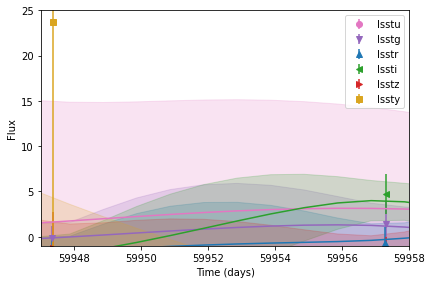

In [27]:
fig, axis = plt.subplots()
object_id = "plasticc_000001920"
start_time = 59940
start_time = 59947
end_time = 60090
end_time = 59958
dataset.plot_light_curve(object_id=object_id, axis=axis, show_gp=True)
axis.set_xlim(start_time, end_time)
axis.set_ylim(-1, 25)

In [53]:
window = (end_time - start_time) / 5
print(window)
ts = TimeSeriesObject.from_astronomical_object(dataset.get_object(object_id=object_id))
slider = Slider(window)
start_time = 59940
end_time = 60090
windows_dict = slider.extract_from_time_series_object(ts, start_time, end_time)

30.0


In [57]:
df = ts.observations[ts["time"] > start_time]
for band, ranges in windows_dict.items():
    df_b = df[df["band"] == band]
    t_arr = df["time"].to_numpy()
    for win in ranges:
        i, j = win
        if t_arr[j] - t_arr[i] >= window:
            print("error in internva: [%d, %d], time range is larger than window (%f > %f)" % (i, j, t_arr[j] - t_arr[i], window))